In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

example = [['01.10.1965 00:00', 13.88099957,    5.375],
    ['02.10.1965 00:00',    5.802999973,    3.154999971],
    ['03.10.1965 00:00',    9.605699539,    0.564999998],
    ['14.10.1965 00:00',    0.410299987,    1.11500001],
    ['31.10.1965 00:00',    6.184500217,    -0.935000002],
    ['01.11.1965 00:00',    0.347299993,    -5.235000134],
    ['02.11.1965 00:00',    0.158299997,    -8.244999886],
    ['03.11.1965 00:00',    1.626199961,    -3.980000019],
    ['24.10.1966 00:00',    0,              3.88499999],
    ['25.10.1966 00:00',    0.055100001,    1.279999971],
    ['30.10.1966 00:00',    0.25940001,     -5.554999828]]

names = ["date","Pobs","Tobs"]
data = pd.DataFrame(example, columns=names)
data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y %H:%M')



In [5]:
data

,date,Pobs,Tobs
0,1965-10-01,13.8810,5.375
1,1965-10-02,5.8030,3.155
2,1965-10-03,9.6057,0.565
3,1965-10-14,0.4103,1.115
4,1965-10-31,6.1845,-0.935
5,1965-11-01,0.3473,-5.235
6,1965-11-02,0.1583,-8.245
7,1965-11-03,1.6262,-3.980
8,1966-10-24,0.0000,3.885
9,1966-10-25,0.0551,1.280


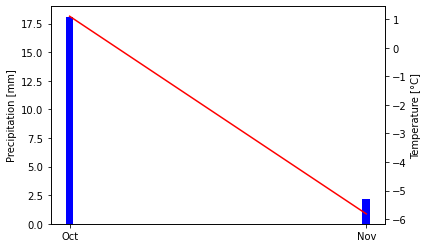

In [4]:
# Temperature:
tempT = data.groupby([data['date'].dt.month_name()], sort=False).mean().eval('Tobs')

# Precipitation:
df_sum = data.groupby([data['date'].dt.month_name(), data['date'].dt.year], sort=False).sum()  # get sum for each individual month
df_sum.index.rename(['month','year'], inplace=True)  # just renaming the index
df_sum.reset_index(level=0, inplace=True)  # make the month-index to a column
tempP = df_sum.groupby([df_sum['month']], sort=False).mean().eval('Pobs')  # get mean over all years

fig = plt.figure();
ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();

xticks = pd.to_datetime(tempP.index.tolist(), format='%B').sort_values() # must work for both axes
ax1.bar(xticks, tempP.values, color='blue')
ax2.plot(xticks, tempT.values, color='red')
plt.xticks(pd.to_datetime(tempP.index.tolist(), format='%B').sort_values()) # to show all ticks

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b")) # must be called after plotting both axes

ax1.set_ylabel('Precipitation [mm]', fontsize=10)
ax2.set_ylabel('Temperature [°C]', fontsize=10)

plt.show()

In [8]:
df_sum = data.groupby([data['date'].dt.month_name(), data['date'].dt.year], sort=False).sum()  # get sum for each individual month
df_sum

,,Pobs,Tobs
date,date,,
October,1965,35.884499,9.275
November,1965,2.131800,-17.460
October,1966,0.314500,-0.390


In [9]:
df_sum.index.rename(['month','year'], inplace=True)  # just renaming the index
df_sum

,,Pobs,Tobs
month,year,,
October,1965,35.884499,9.275
November,1965,2.131800,-17.460
October,1966,0.314500,-0.390


In [10]:
df_sum.reset_index(level=0, inplace=True)  # make the month-index to a column
df_sum

,month,Pobs,Tobs
year,,,
1965,October,35.884499,9.275
1965,November,2.131800,-17.460
1966,October,0.314500,-0.390


In [11]:
tempP = df_sum.groupby([df_sum['month']], sort=False).mean().eval('Pobs')
tempP

month
October     18.0995
November     2.1318
Name: Pobs, dtype: float64

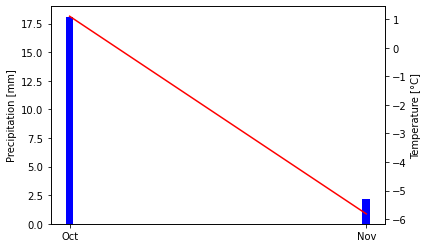

In [24]:
fig = plt.figure();
ax1 = fig.add_subplot(1,1,1);
ax2 = ax1.twinx();

xticks = pd.to_datetime(tempP.index.tolist(), format='%B').sort_values() # must work for both axes
ax1.bar(xticks, tempP.values, color='blue')
ax2.plot(xticks, tempT.values, color='red')
plt.xticks(pd.to_datetime(tempP.index.tolist(), format='%B').sort_values()) # to show all ticks

ax1.xaxis.set_major_formatter(mdates.DateFormatter("%b")) # must be called after plotting both axes

ax1.set_ylabel('Precipitation [mm]', fontsize=10)
ax2.set_ylabel('Temperature [°C]', fontsize=10)

plt.show()

In [25]:
xticks

DatetimeIndex(['1900-10-01', '1900-11-01'], dtype='datetime64[ns]', freq=None)